In [32]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [33]:
# load the dataset

data = pd.read_csv('M1_final.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [34]:
# basic statistics

data.describe()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [35]:
# basics statistics (continued)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [36]:
# check for missing values
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [37]:
# clean the data
data.fillna(0, inplace=True)  


In [ ]:
# import model evaluation programs

from sklearn.metrics import r2_score, mean_squared_error


In [39]:
# Select the data points needed (independent and dependent variables)

x = data["Wind Speed"].values.reshape(-1, 1)
y = data["DEP_DELAY"].values.reshape(-1, 1)

In [40]:
# Train the linear regression model

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [41]:
# Train the model
# Split the Dataset into 80% Training and 20% Testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("\nTraining set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


Training set shape: (23056, 1)
Testing set shape: (5764, 1)


In [42]:
# Train a new Linear Regression model on the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Make Predictions on the Test Set
y_pred = model.predict(x_test)

# Evaluate the Model using R-squared and Root Mean Square Error (RMSE)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nModel Evaluation Metrics:")
print("R-squared:", r2)
print("RMSE:", rmse)


Model Evaluation Metrics:
R-squared: 0.004082118875513352
RMSE: 38.1039710007026


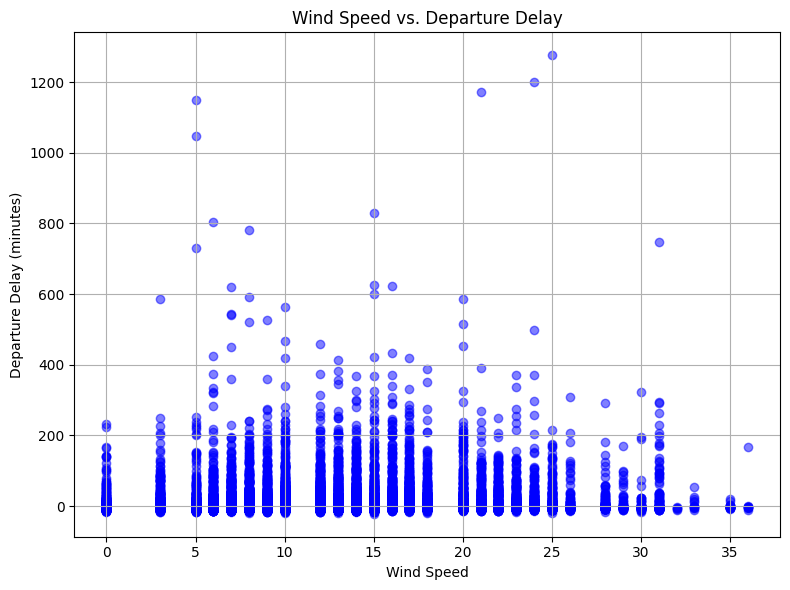

In [43]:
# Visualisation 1: Relationship between Wind Speed and Departure Delay

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel("Wind Speed")
plt.ylabel("Departure Delay (minutes)")
plt.title("Wind Speed vs. Departure Delay")
plt.grid(True)
plt.tight_layout()
plt.show()


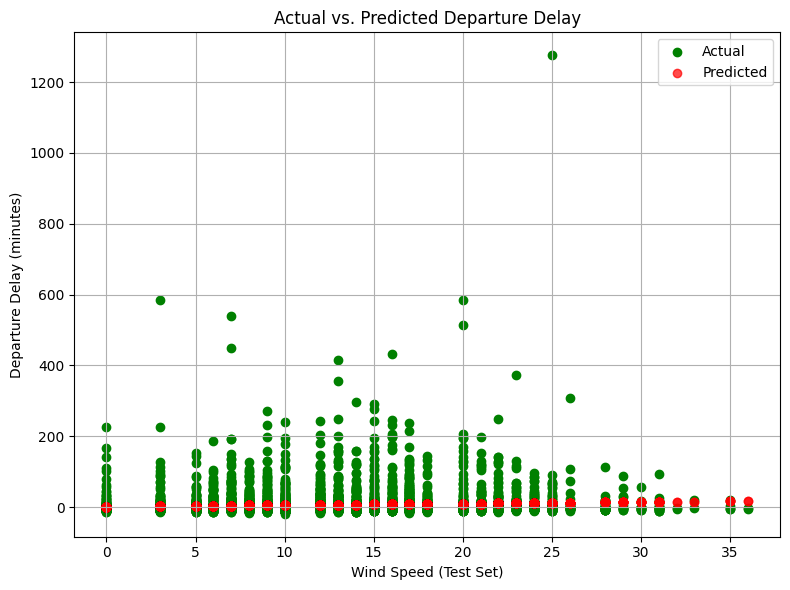

In [44]:
# Visualization 2: Actual vs. Predicted Departure Delay on the Test Set

plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='green', label="Actual")
plt.scatter(x_test, y_pred, color='red', label="Predicted", alpha=0.7)
plt.xlabel("Wind Speed (Test Set)")
plt.ylabel("Departure Delay (minutes)")
plt.title("Actual vs. Predicted Departure Delay")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()